## Jupyter notebook for computing correlations between HiC replicates across time
This notebook is the code for computing the correlations between replicates of the time course Hi-C used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre. 

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages. 

In [1]:
library(reshape2)
library(ggplot2)
library(hicrep)


### load Hi-C data for replicate 1 and replicate 2

In [2]:
T0_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_40k_rep1_chr1.txt', header=T)
T20_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_40k_rep1_chr1.txt', header=T)
T1H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_40k_rep1_chr1.txt', header=T)
T4H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_40k_rep1_chr1.txt', header=T)

In [3]:
T0_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_40k_rep2_chr1.txt', header=T)
T20_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_40k_rep2_chr1.txt', header=T)
T1H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_40k_rep2_chr1.txt', header=T)
T4H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_40k_rep2_chr1.txt', header=T)

### Calculate correlations for Hi-C replicates by functions from hicrep package

In [4]:

name0 <- data.frame(firstvar = c('T0_rep1', 'T20_rep1', 'T1H_rep1', 'T4H_rep1'), 
                    secondvar = c('T0_rep1', 'T20_rep2', 'T1H_rep2', 'T4H_rep2'))
name20 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'), 
                    secondvar = c('T20_rep1', 'T20_rep2', 'T20_rep1', 'T20_rep2'))
name60 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'), 
                    secondvar = c('T1H_rep1', 'T1H_rep2', 'T1H_rep1', 'T1H_rep2'))
name180 <- data.frame(firstvar = c('T1H_rep1', 'T1H_rep1', 'T1H_rep2', 'T1H_rep2'), 
                    secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
name220 <- data.frame(firstvar = c('T20_rep1', 'T20_rep1', 'T20_rep2', 'T20_rep2'), 
                    secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
name240 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'), 
                    secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
                    

In [5]:
name0 <- lapply(name0,as.character)
name20 <- lapply(name20,as.character)
name60 <- lapply(name60,as.character)
name180 <- lapply(name180,as.character)
name220 <- lapply(name220,as.character)
name240 <- lapply(name240,as.character)


### the calculation is very slow. I will load the results I saved before in this package

In [22]:
corr0 <- numeric(0)
for (ii in 1:4) {
  #h_hat <- htrain(eval(as.symbol(name0$firstvar[ii])), eval(as.symbol(name0$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name0$firstvar[ii])), eval(as.name(name0$secondvar[ii])), 40000, 1, 100000)
  corr0 = paste(corr0, get.scc(corr_prep, 40000, 100000)$scc)
  print(corr0)
}


[1] " 1"
[1] " 1 0.939636205280908"
[1] " 1 0.939636205280908 0.937831617507005"
[1] " 1 0.939636205280908 0.937831617507005 0.938314421739451"


In [23]:
corr0

[1] " 1 0.939636205280908 0.937831617507005 0.938314421739451"

In [24]:
corr20 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name20$firstvar[ii])), eval(as.symbol(name20$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name20$firstvar[ii])), eval(as.name(name20$secondvar[ii])), 40000, h_hat, 100000)
  corr20 = paste(corr20, get.scc(corr_prep, 40000, 100000)$scc)
}
                 

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4


In [25]:
corr40 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name40$firstvar[ii])), eval(as.symbol(name40$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name40$firstvar[ii])), eval(as.name(name40$secondvar[ii])), 40000, h_hat, 100000)
  corr40 = paste(corr40, get.scc(corr_prep, 40000, 100000)$scc)
}
   

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4


In [25]:
corr60 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name60$firstvar[ii])), eval(as.symbol(name60$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name60$firstvar[ii])), eval(as.name(name60$secondvar[ii])), 40000, h_hat, 100000)
  corr60 = paste(corr60, get.scc(corr_prep, 40000, 100000)$scc)
}
   

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4


In [26]:
corr180 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name180$firstvar[ii])), eval(as.symbol(name180$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name180$firstvar[ii])), eval(as.name(name180$secondvar[ii])), 40000, h_hat, 100000)
  corr180 = paste(corr180, get.scc(corr_prep, 40000, 100000)$scc)
}

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4


In [27]:
corr220 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name220$firstvar[ii])), eval(as.symbol(name220$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name220$firstvar[ii])), eval(as.name(name220$secondvar[ii])), 40000, h_hat, 100000)
  corr220 = paste(corr220, get.scc(corr_prep, 40000, 100000)$scc)
}
       

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:5


In [28]:
corr240 <- numeric(0)
for (ii in 1:4) {
  h_hat <- htrain(eval(as.symbol(name240$firstvar[ii])), eval(as.symbol(name240$secondvar[ii])), 40000, 100000, 0:10)
  corr_prep <- prep(eval(as.name(name240$firstvar[ii])), eval(as.name(name240$secondvar[ii])), 40000, h_hat, 100000)
  corr240 = paste(corr240, get.scc(corr_prep, 40000, 100000)$scc)
}

smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4
smoothing:0
smoothing:1
smoothing:2
smoothing:3
smoothing:4


In [29]:
data_forplot <- data.frame(x=rep(c(0,20,40,60,180,220,240), each=4), 
                           y=c(corr0, corr20, corr40, corr60, corr180, corr220,corr240))

ERROR: Error in data.frame(x = rep(c(0, 20, 40, 60, 180, 220, 240), each = 4), : object 'corr40' not found


### plot the results

In [8]:
load('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_correlation.RDATA')

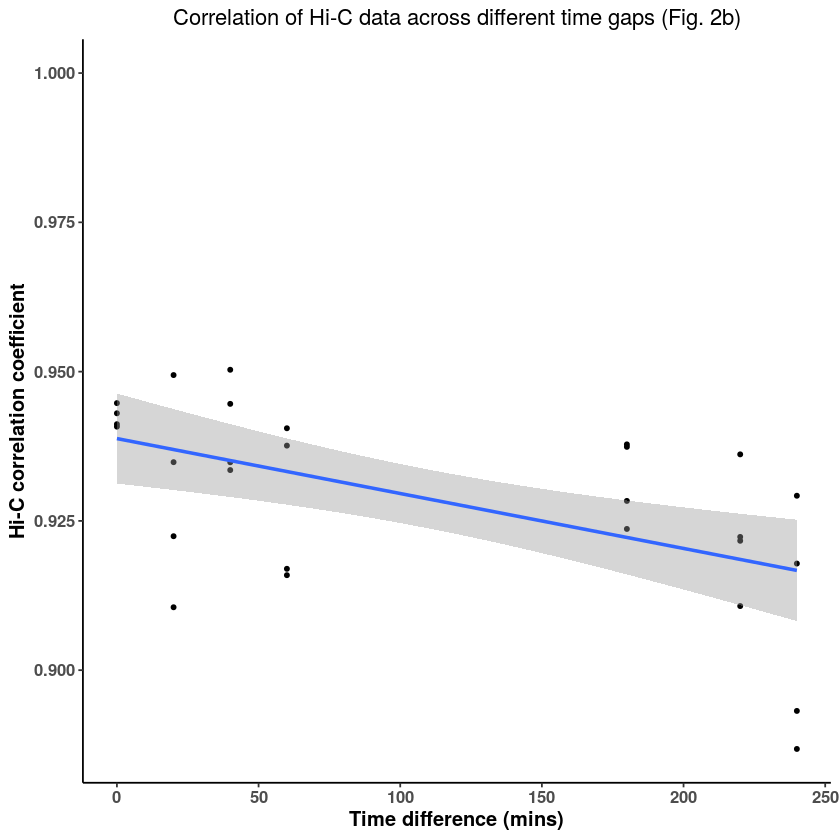

In [14]:

ggplot(data_forplot, aes(x=x, y=y)) + geom_point(size=1) + geom_smooth(method="gam") + 
xlab('Time difference (mins)') + ylab('Hi-C correlation coefficient') + ggtitle('Correlation of Hi-C data across different time gaps (Fig. 2b)') + scale_y_continuous(limits=c(NA,1))+
theme(
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  legend.title=element_blank(),
  plot.title=element_text(hjust=0.5),
  axis.title=element_text(size=12,face="bold"),
  axis.text.x = element_text(size=10, face="bold"),
  axis.text.y = element_text(size=10, face="bold"),
  axis.line = element_line(colour = "black"))
